# 读取结果画图

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from swmm_api import read_inp_file, read_out_file,read_rpt_file
from pyswmm import Simulation
import get_output
import flooding_fig

In [2]:
def simulation(filename):
    with Simulation(filename) as sim:
       #stand_reward=0
        for step in sim:
            pass    

# 先运行所有inp生成结果

In [4]:
for item in items:
    for rain in rains:
        file='./'+pack+'/'+item+'/'+rain
        simulation(file+'.inp')

# 读取Flooding结果数据

In [3]:
#读取flooding excel数据
data={}
for rain in [str(i) for i in range(10)]:
    data[rain]=pd.read_excel('Flooding results.xlsx',sheet_name='rain'+rain).values[:,1:]


In [4]:
plt.figure()
for i in range(len(items)):
    plt.plot(data['1'][i],label=str(i))
plt.legend()

NameError: name 'items' is not defined

<Figure size 432x288 with 0 Axes>

writer = pd.ExcelWriter('Flooding results.xlsx')
for rain in [str(i) for i in range(10)]:
    tem=[]
    for item in range(len(items)):
        tem.append(data[rain][item])
    df=pd.DataFrame(np.array(tem))
    df.to_excel(writer,sheet_name='rain'+rain)
writer.save()

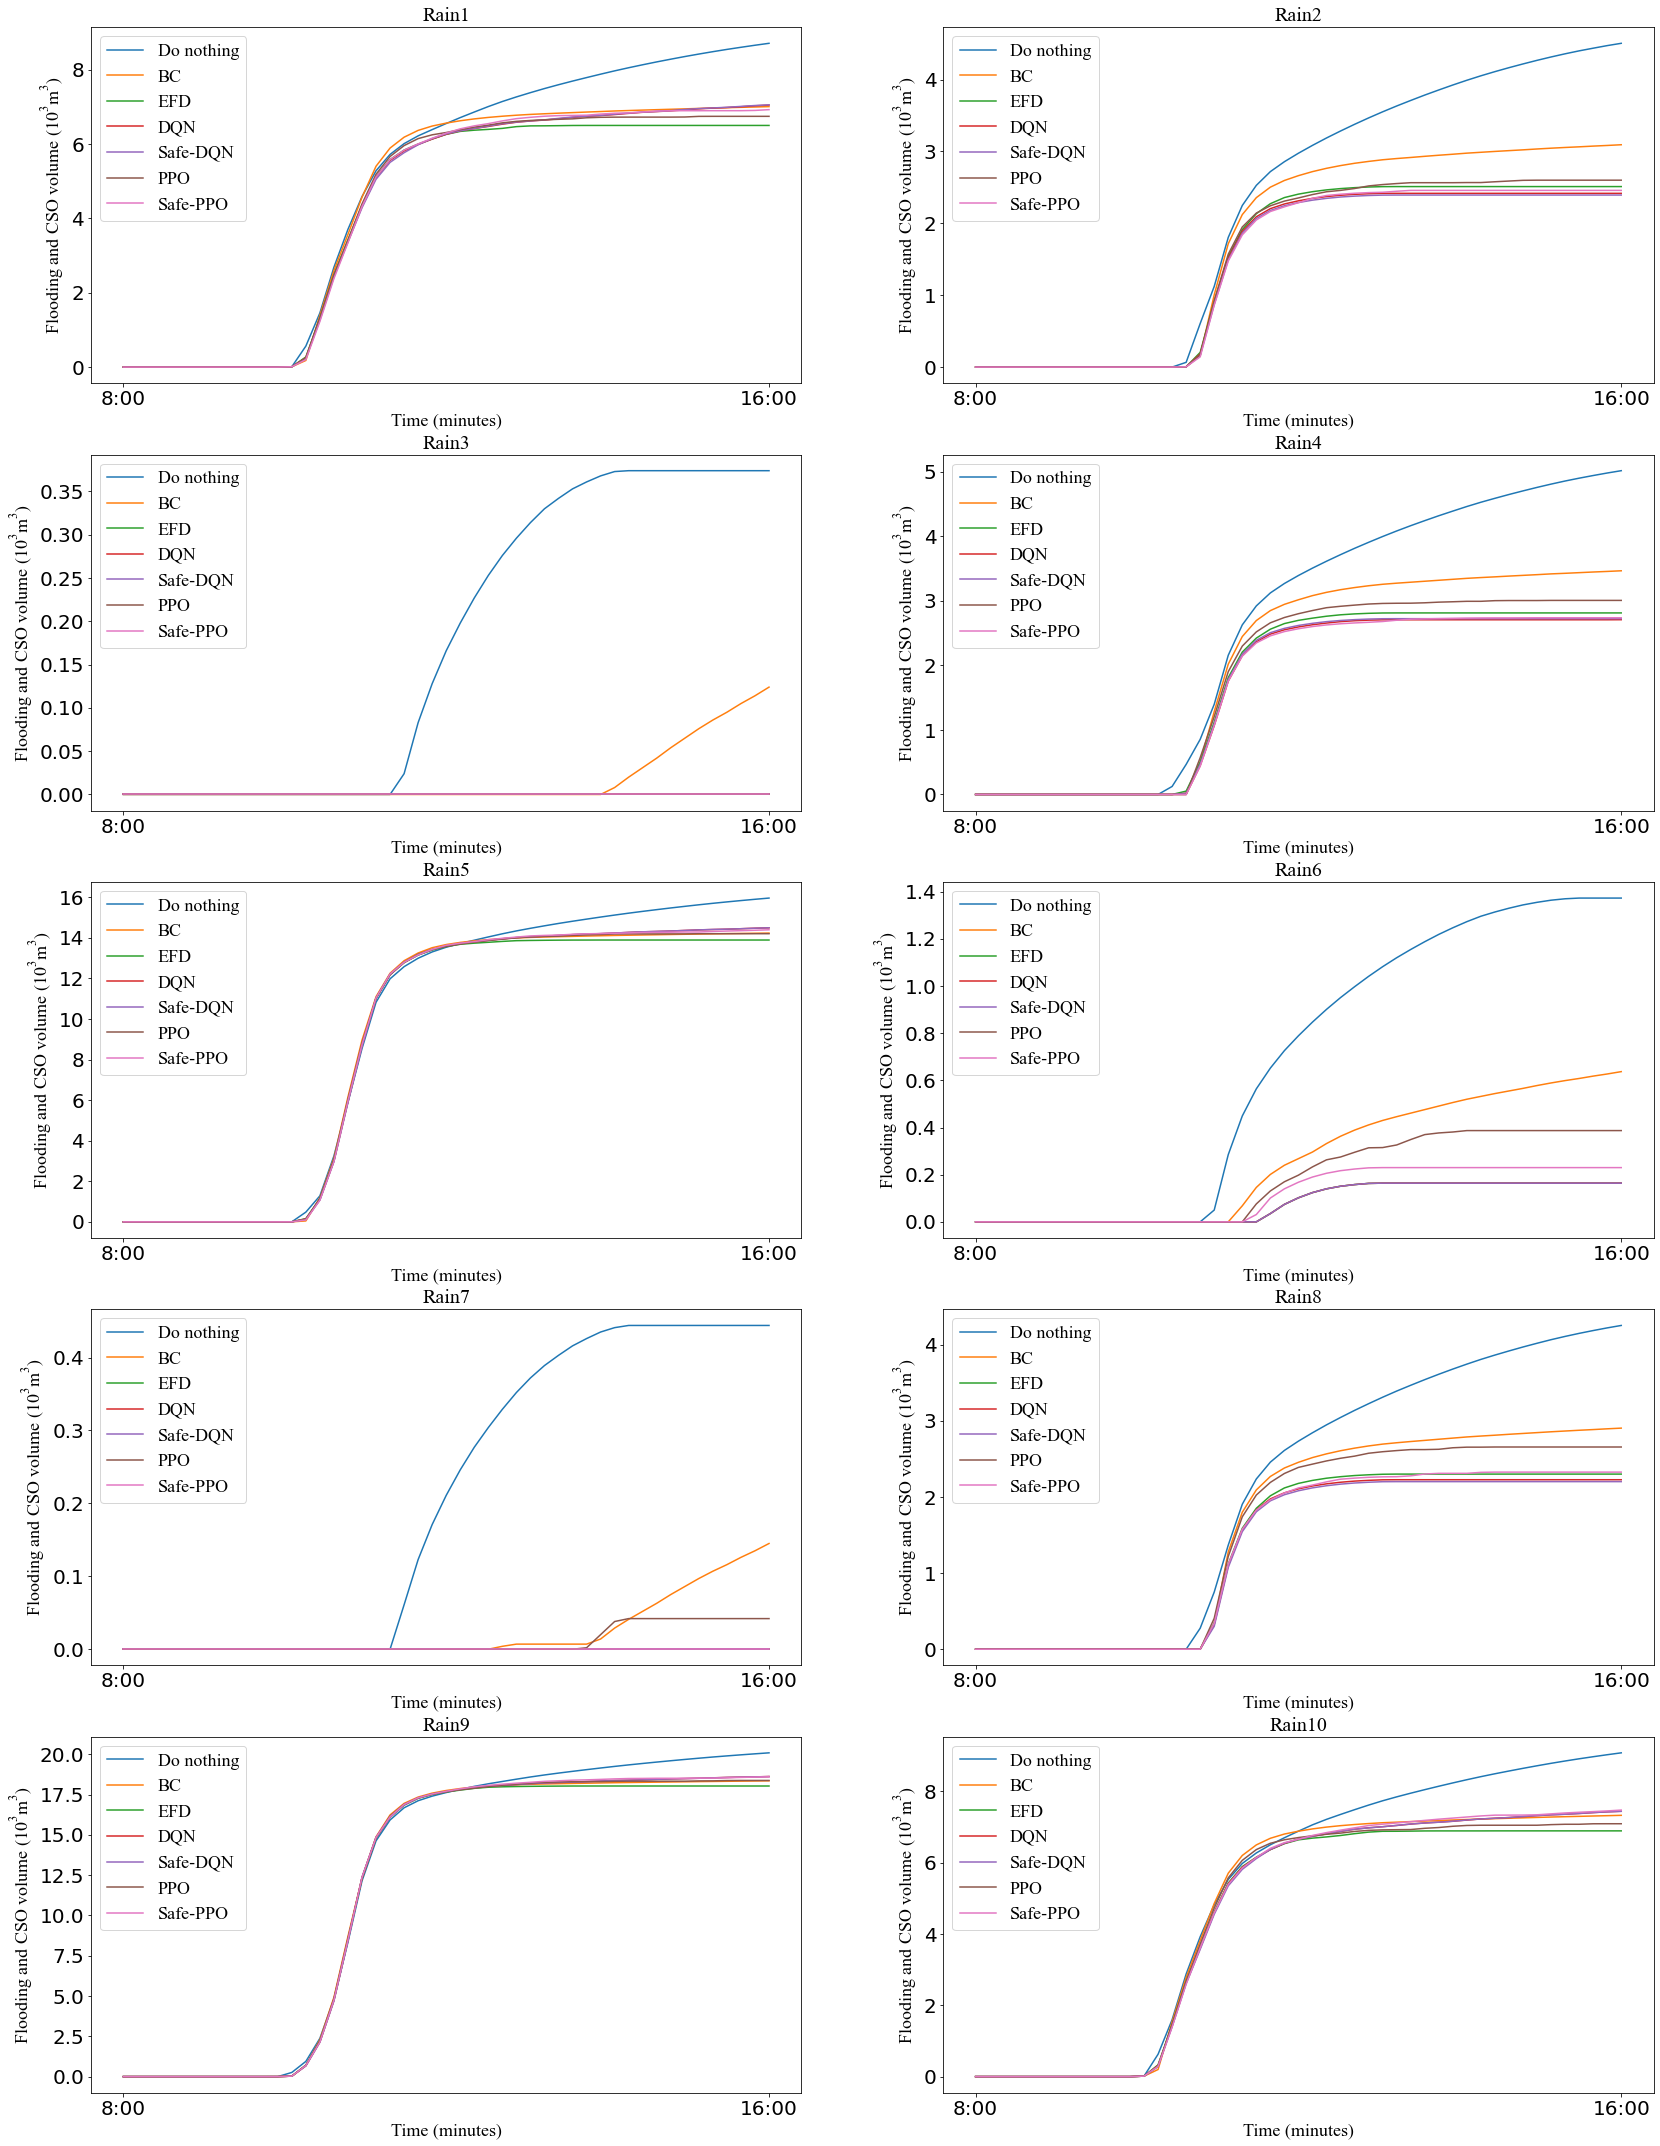

In [5]:
items=['HC','BC_test_result','EFD_test_result',
       'ddqn nosafe_test_result','ddqn safe_test_result',
       'ppo2 nosafe_test_result','ppo2 safe_test_result']
pack='final-noAFI-drain'
rains=[str(i) for i in range(10)]

#读取flooding excel数据
data={}
for rain in [str(i) for i in range(10)]:
    data[rain]=pd.read_excel('Flooding results.xlsx',sheet_name='rain'+rain).values[:,1:]

titles=['Do nothing','BC','EFD','DQN','Safe-DQN','PPO','Safe-PPO']
fig=plt.figure(figsize=(28,38))


font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 18,
}
font0 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}
myt=['8:00','16:00']
myx=[0,46]
img=1
for i in range(1,6):
    for j in range(1,3):
        fig.add_subplot(5,2,img)
        k=0
        for i in range(len(items)):
            plt.title('Rain'+str(img),fontdict=font0)
            plt.plot(data[str(img-1)][k],label=titles[k])
            plt.xticks(myx,myt,fontsize=20)
            plt.yticks(fontsize=20)
            plt.xlabel('Time (minutes)',font1)
            plt.ylabel('Flooding and CSO volume ($\mathregular{10^3}\mathregular{m^3}$)',font1)
            k=k+1
        img+=1
        plt.legend(prop=font1)
fig.savefig('5.1.1.png',dpi=100)

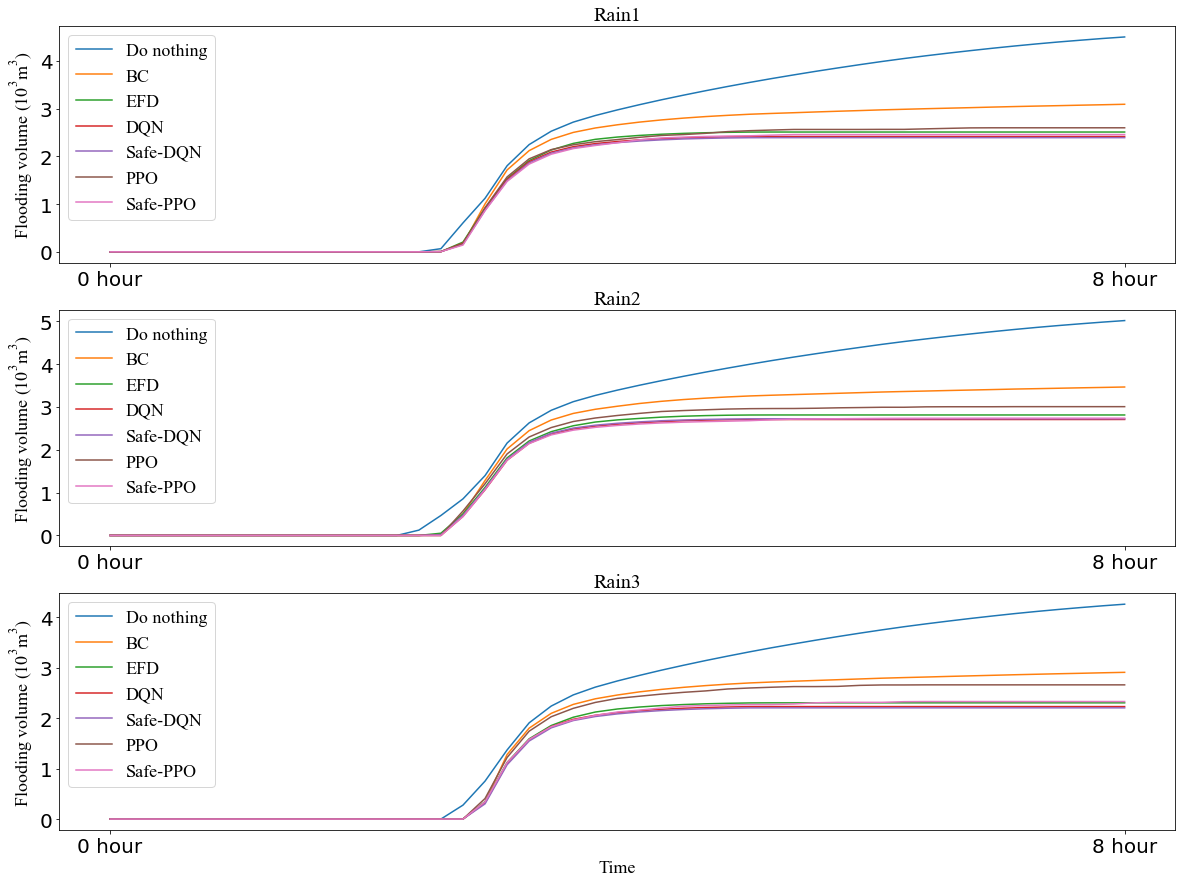

In [18]:
items=['HC','BC_test_result','EFD_test_result',
       'ddqn nosafe_test_result','ddqn safe_test_result',
       'ppo2 nosafe_test_result','ppo2 safe_test_result']
pack='final-noAFI-drain'
rains=[str(i) for i in range(10)]

#读取flooding excel数据
data={}
for rain in ['1','3','7']:
    data[rain]=pd.read_excel('Flooding results.xlsx',sheet_name='rain'+rain).values[:,1:]

titles=['Do nothing','BC','EFD','DQN','Safe-DQN','PPO','Safe-PPO']
fig=plt.figure(figsize=(20,20))


font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 18,
}
font0 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}

rains=['1','3','7']
myt=['0 hour','8 hour']
myx=[0,46]
img=1
for i in range(1,4):
    fig.add_subplot(4,1,img)
    k=0
    for i in range(len(items)):
        plt.title('Rain'+str(img),fontdict=font0)
        plt.plot(data[rains[img-1]][k],label=titles[k])
        plt.xticks(myx,myt,fontsize=20)
        plt.yticks(fontsize=20)
        if img==3:
            plt.xlabel('Time',font1)
        plt.ylabel('Flooding volume ($\mathregular{10^3}\mathregular{m^3}$)',font1)
        k=k+1
    img+=1
    plt.legend(prop=font1)
fig.savefig('5.1.1.png',bbox_inches='tight',dpi=100)

In [9]:
#保存flooding值为excel表，方便复制 
items=['HC','BC_test_result','EFD_test_result',
       'ddqn nosafe_test_result','ddqn safe_test_result',
       'ppo2 nosafe_test_result','ppo2 safe_test_result']
rains=['1','3','7']
save=[]
for rain in rains:
    tem=[]
    for k in range(len(items)):
        tem.append(data[rain][k][-1])
    save.append(tem)

pd.DataFrame(save).to_excel('all_flooding.xlsx')

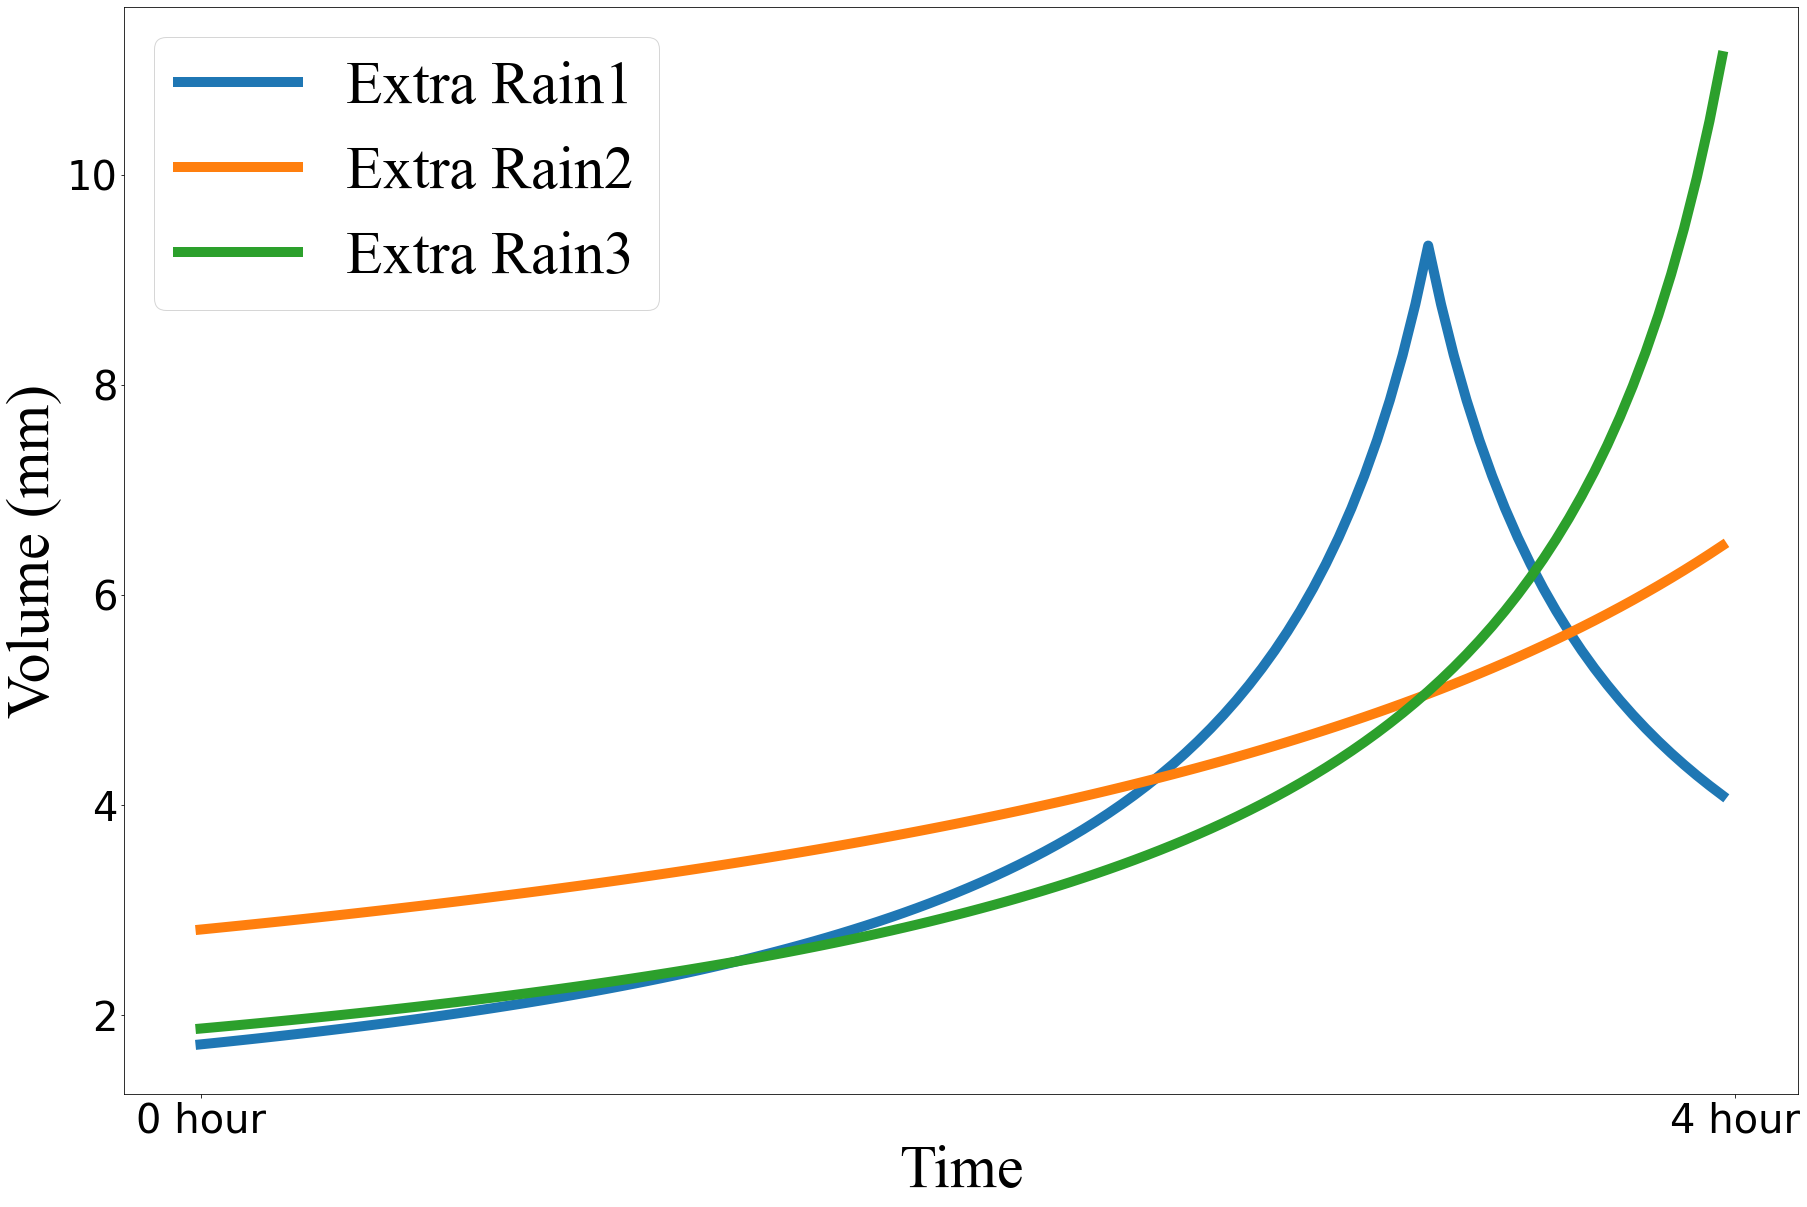

In [28]:
#画降雨图
#从inp文件中读取
from swmm_api.input_file.section_labels import TIMESERIES
from swmm_api import read_inp_file

rains=['1','3','7']
item='HC'
pack='final-noAFI-drain'

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 60,
}

plt.figure(figsize=(30,20))
img=1
for rain in rains:
    file='./'+pack+'/'+item+'/'+str(rain)
    inp = read_inp_file(file+'.inp', convert_sections=[TIMESERIES])  # type: swmm_api.SwmmInput
    sec_timeseries = inp[TIMESERIES]
    ts = inp[TIMESERIES]['Oneyear-2h'].frame.values.tolist()
    plt.plot(ts,linewidth=10,label='Extra Rain'+str(img))
    img+=1
myt=['0 hour','4 hour']
myx=[0,len(ts)]
plt.xticks(myx,myt,fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Time',font1)
plt.ylabel('Volume (mm)',font1)
plt.legend(prop=font1,loc='upper left')

plt.savefig('all_extra_rainfall.png',bbox_inches='tight',dpi=100)

# 读取T3水位数据

In [9]:
#从rpt获取平均水位
data_d_average={}
for rain in [str(i) for i in range(10)]:
    tem=[]
    for item in items:
        file='./'+pack+'/'+item+'/'+rain+'.rpt'
        rpt = read_rpt_file(file)  # type: swmm_api.SwmmReport
        node_d = rpt.node_depth_summary  # type: pandas.DataFrame
        tem.append(node_d)
    data_d_average[rain]=tem
        

In [51]:
for rain in [str(i) for i in range(10)]:
    print('Rain number:',rain)
    
    for item in range(len(items)):
        average=0
        for pool in ['T1','T2','T3','T4','T5','T6']:
            average+=data_d_average[rain][item]['Average_Depth_Meters'][pool]
        print(items[item],':',average/6)

Rain number: 0
HC : 3.0083333333333333
BC_test_result : 3.5533333333333332
EFD_test_result : 3.555
ddqn nosafe_test_result : 3.4883333333333333
ddqn safe_test_result : 3.483333333333333
ppo2 nosafe_test_result : 3.516666666666666
ppo2 safe_test_result : 3.4966666666666666
Rain number: 1
HC : 2.5633333333333335
BC_test_result : 3.185
EFD_test_result : 3.151666666666667
ddqn nosafe_test_result : 3.1183333333333336
ddqn safe_test_result : 3.105
ppo2 nosafe_test_result : 3.1533333333333338
ppo2 safe_test_result : 3.14
Rain number: 2
HC : 1.5683333333333334
BC_test_result : 2.166666666666667
EFD_test_result : 1.93
ddqn nosafe_test_result : 1.92
ddqn safe_test_result : 1.9033333333333333
ppo2 nosafe_test_result : 1.9699999999999998
ppo2 safe_test_result : 1.9549999999999998
Rain number: 3
HC : 2.6950000000000003
BC_test_result : 3.3383333333333334
EFD_test_result : 3.308333333333333
ddqn nosafe_test_result : 3.2849999999999997
ddqn safe_test_result : 3.2816666666666667
ppo2 nosafe_test_resul

# 读取V1-V6流量数据

detV3_data={}
pump_list=['V3']
data,name,_,_=get_output.read_out('./final-noAFI-drain/HC/0.out')
T=len(data)
for rain in [str(i) for i in range(10)]:
    tem=[]
    for item in items:
        file='./'+pack+'/'+item+'/'+rain
        dtem=[]
        for t in range(T):
            dtem.append(get_output.flow(file+'.out',pump_list,t)[pump_list[0]])
        tem.append(dtem)   
    detV3_data[rain]=tem

print(np.array(detV3_data['0']).shape)
writer = pd.ExcelWriter('V3_flow.xlsx')
for i in range(10):
    df=pd.DataFrame(np.array(detV3_data[str(i)]))
    df.to_excel(writer,sheet_name='rain'+str(i))
writer.save()

In [57]:
pump_list=['V1','V2','V4','V5','V6']
data,name,_,_=get_output.read_out('./final-noAFI-drain/HC/0.out')
T=len(data)

for pump in pump_list:
    detV_data={}
    for rain in [str(i) for i in range(10)]:
        tem=[]
        for item in items:
            file='./'+pack+'/'+item+'/'+rain
            dtem=[]
            for t in range(T):
                dtem.append(get_output.flow(file+'.out',pump_list,t)[pump])
            tem.append(dtem)   
        detV_data[rain]=tem
    writer = pd.ExcelWriter(pump+'_flow.xlsx')
    for i in range(10):
        df=pd.DataFrame(np.array(detV_data[str(i)]))
        df.to_excel(writer,sheet_name='rain'+str(i))
    writer.save()

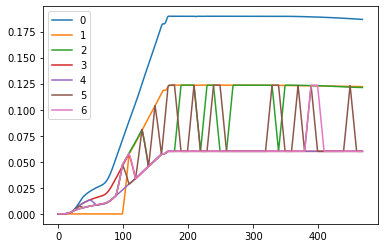

In [59]:
items=['HC','BC_test_result','EFD_test_result',
       'ddqn nosafe_test_result','ddqn safe_test_result',
       'ppo2 nosafe_test_result','ppo2 safe_test_result']
plt.figure()
for i in range(len(items)):
    plt.plot(detV3_data['8'][i][1:],label=str(i))
plt.legend()

In [6]:
#读取流量excel数据
detV3_data=pd.read_excel('V1_flow.xlsx',sheet_name='rain1').values[:,2:]

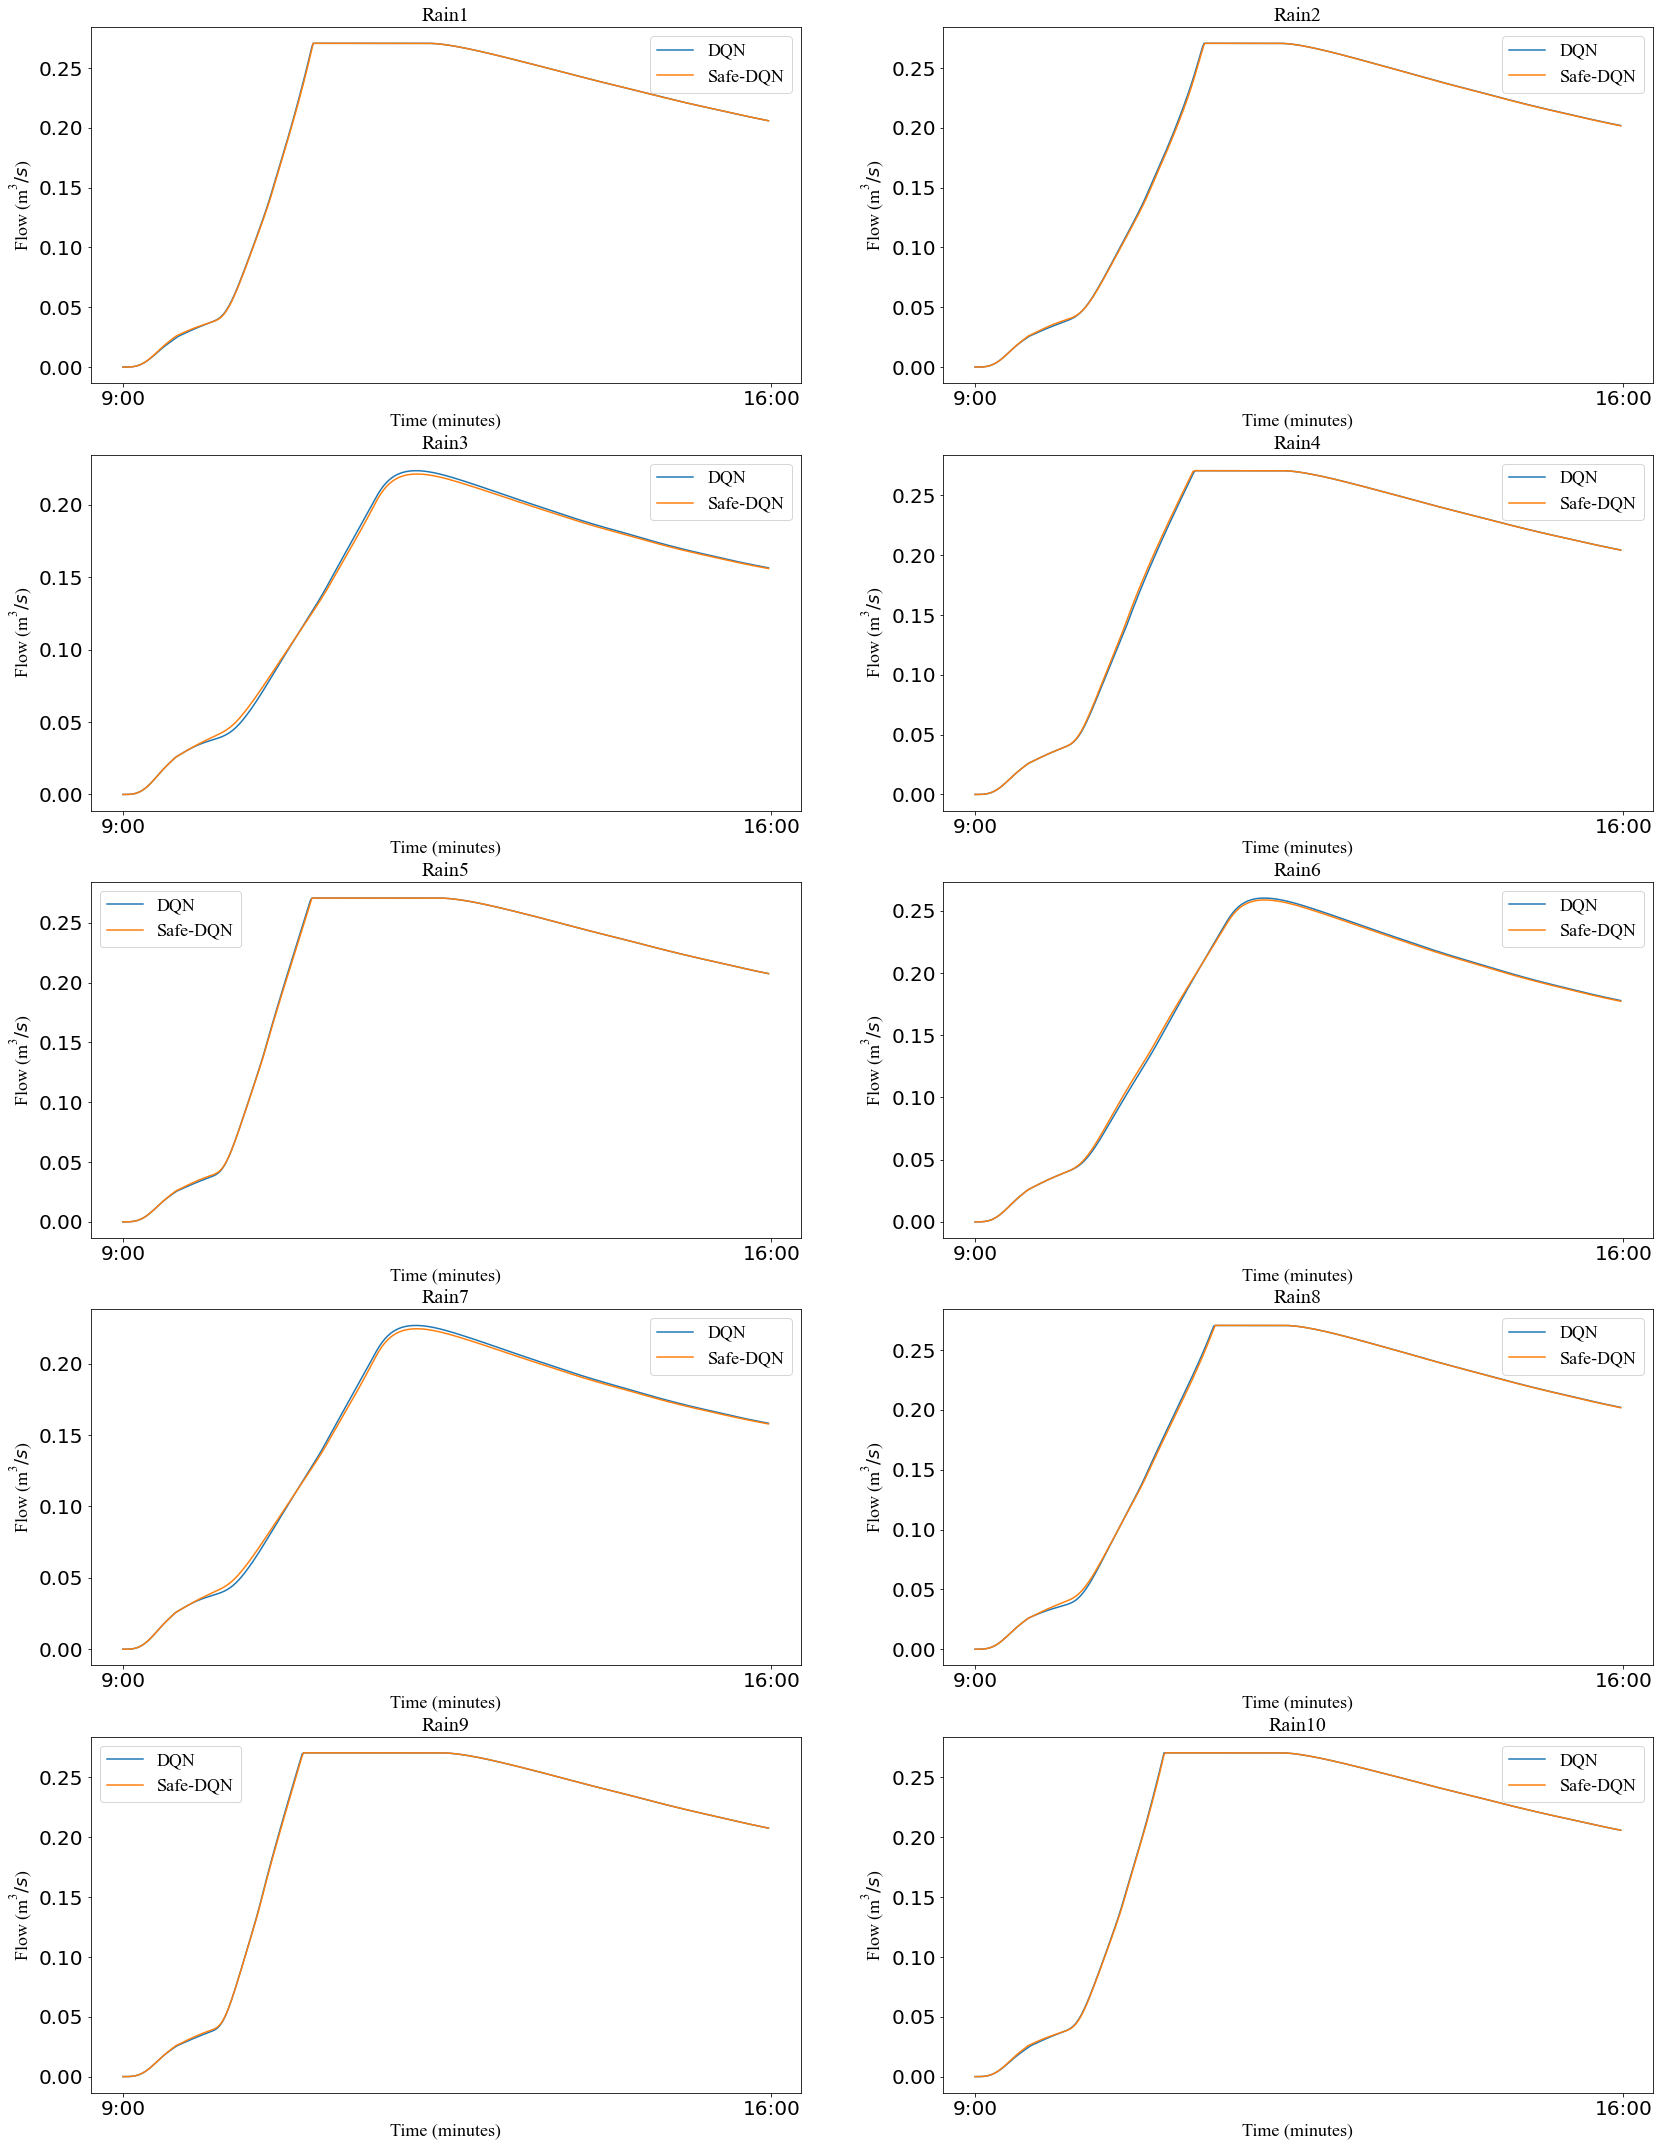

In [12]:
titles=['DQN','Safe-DQN']
V='V1'

fig=plt.figure(figsize=(28,38))
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 18,
}
font0 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}


myt=['9:00','16:00']
myx=[0,470]
img=1
for i in range(1,6):
    for j in range(1,3):
        fig.add_subplot(5,2,img)
        k=0
        detV3_data=pd.read_excel(V+'_flow.xlsx',sheet_name='rain'+str(img-1)).values[:,2:]
        for i in range(3,5):
            plt.title('Rain'+str(img),fontdict=font0)
            plt.plot(detV3_data[i,:],label=titles[k])
            plt.xticks(myx,myt,fontsize=20)
            plt.yticks(fontsize=20)
            plt.xlabel('Time (minutes)',font1)
            plt.ylabel('Flow ($\mathregular{m^3}/s$)',font1)
            k=k+1
        img+=1
        plt.legend(prop=font1)
fig.savefig('5.1.2-'+V+'_'+'DQN'+'_.png',dpi=100)

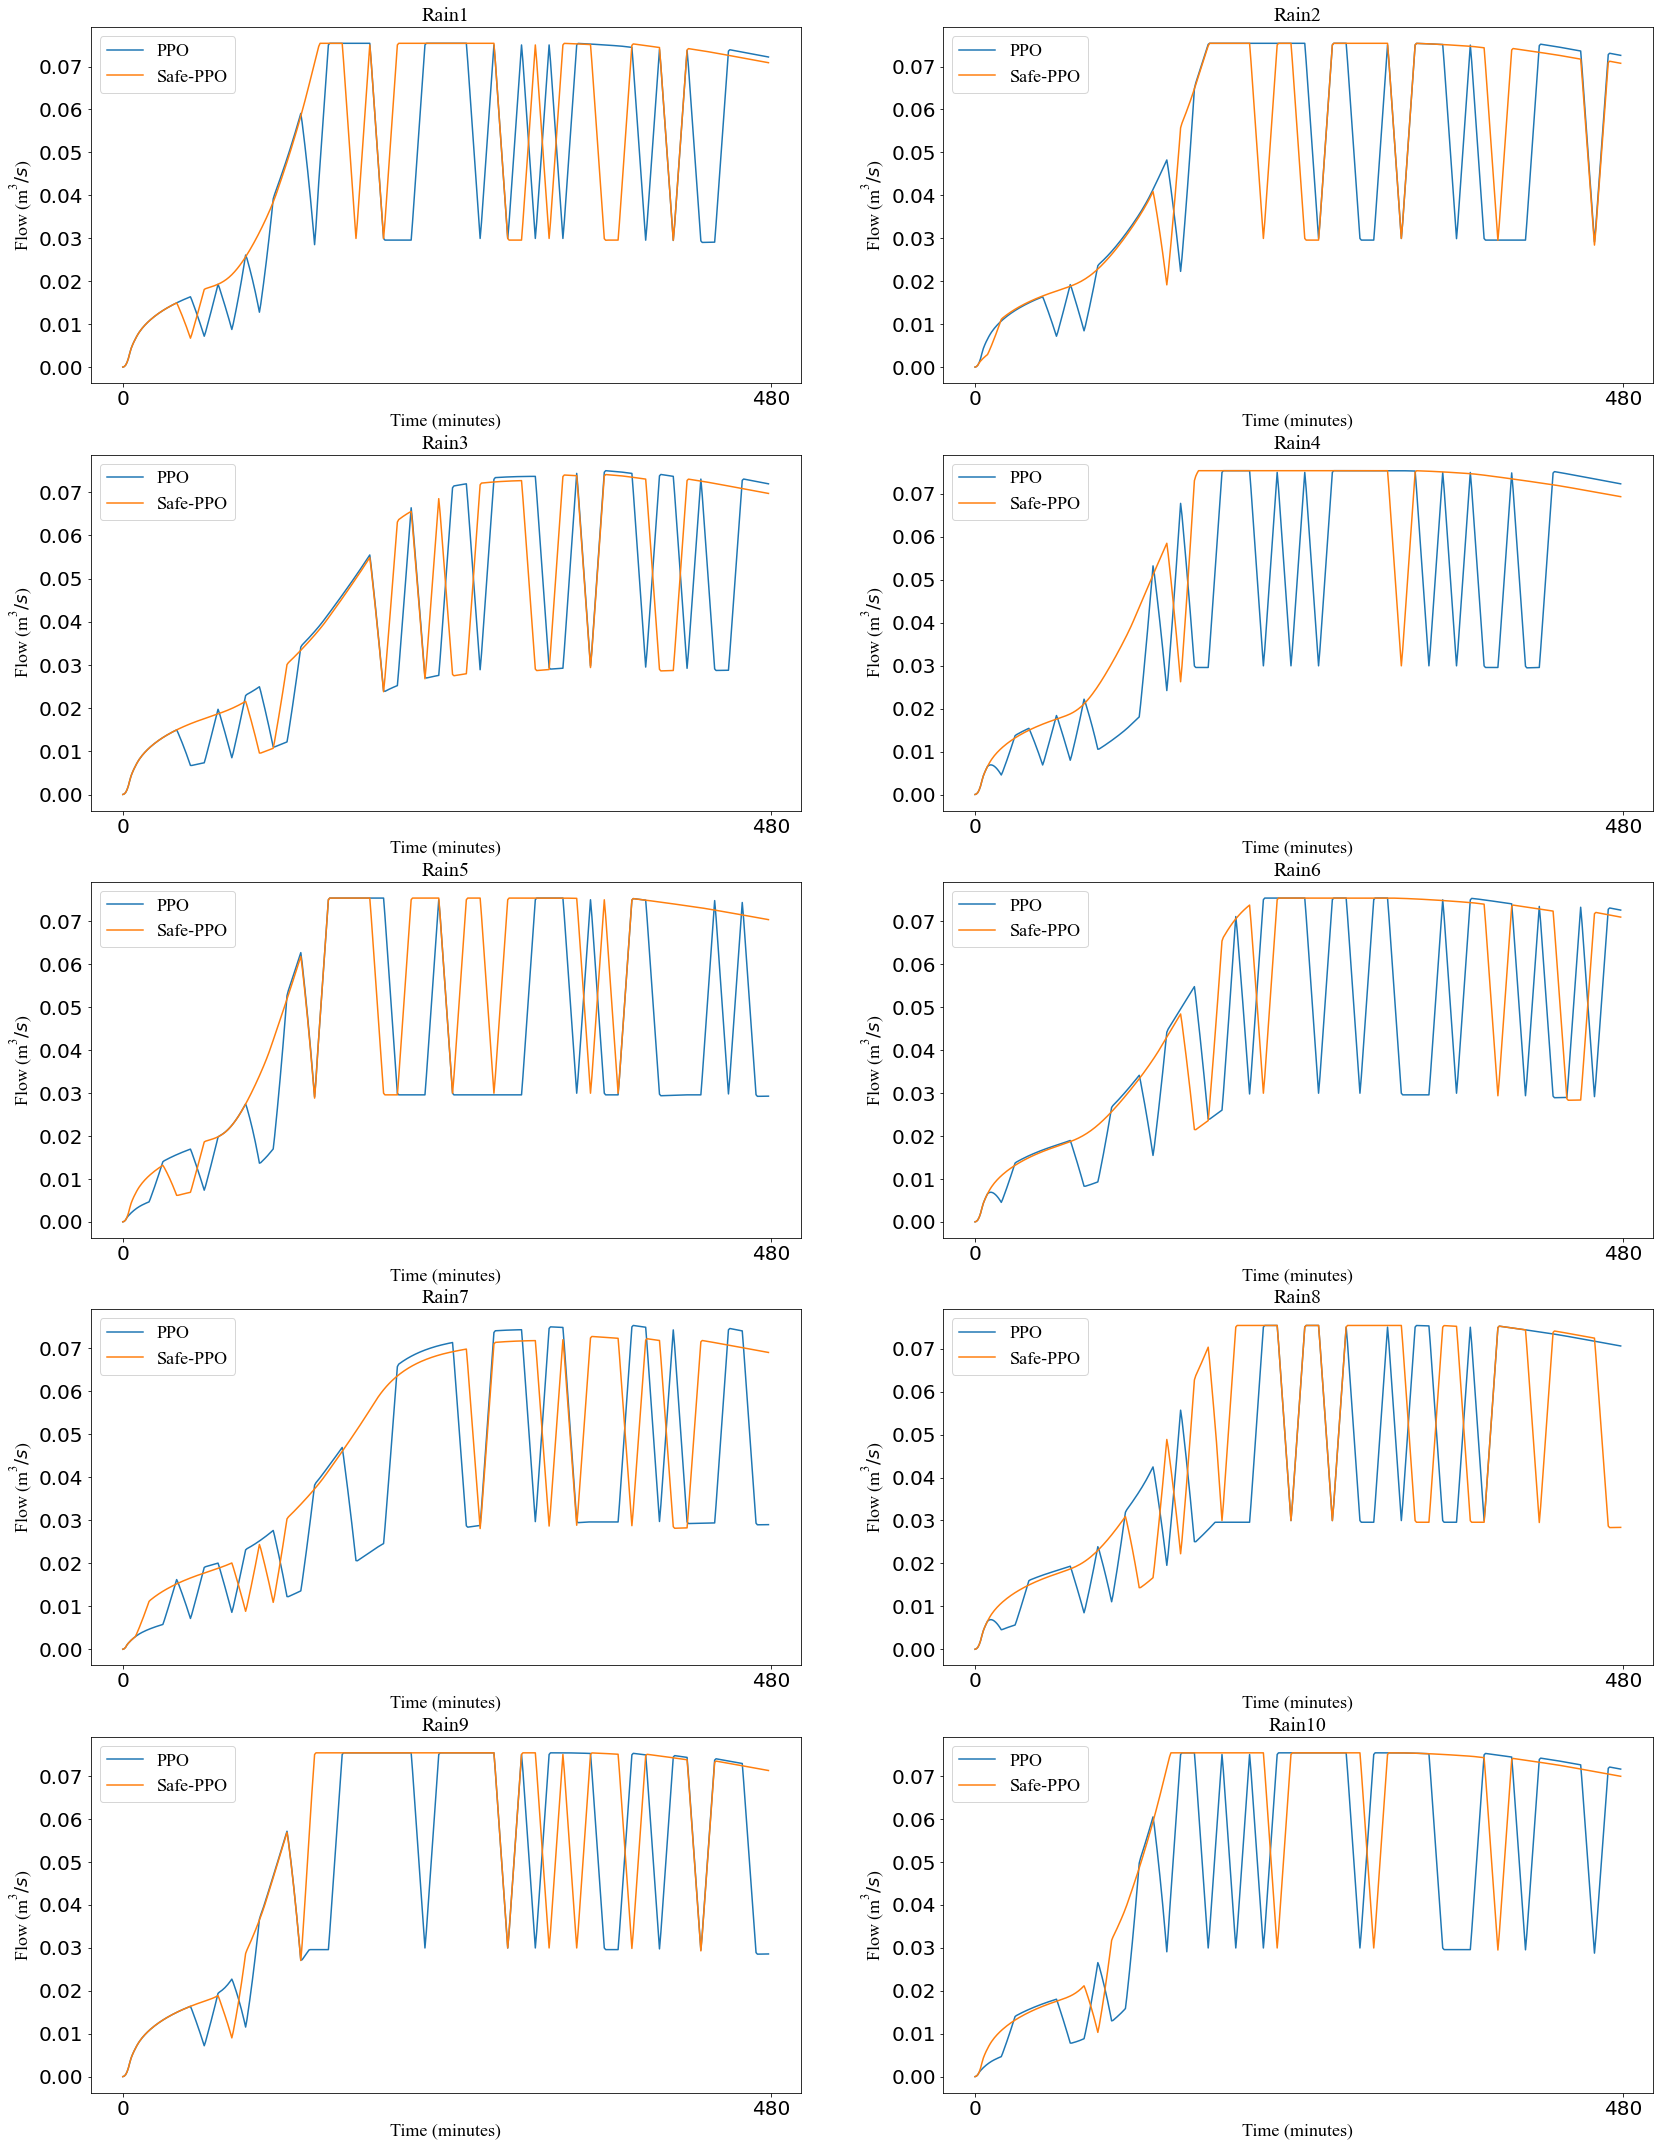

In [18]:
titles=['PPO','Safe-PPO']
V='V6'

fig=plt.figure(figsize=(28,38))
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 18,
}
font0 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}


myt=['0','480']
myx=[0,470]
img=1
for i in range(1,6):
    for j in range(1,3):
        fig.add_subplot(5,2,img)
        k=0
        detV3_data=pd.read_excel(V+'_flow.xlsx',sheet_name='rain'+str(img-1)).values[:,2:]
        for i in range(5,7):
            plt.title('Rain'+str(img),fontdict=font0)
            plt.plot(detV3_data[i,:],label=titles[k])
            plt.xticks(myx,myt,fontsize=20)
            plt.yticks(fontsize=20)
            plt.xlabel('Time (minutes)',font1)
            plt.ylabel('Flow ($\mathregular{m^3}/s$)',font1)
            k=k+1
        img+=1
        plt.legend(prop=font1)
fig.savefig('5.1.2-'+V+'_'+'PPO'+'_.png',dpi=500)

# 读取V1-V6控制曲线

In [17]:
#从inp文件中读取
from swmm_api.input_file.section_labels import TIMESERIES
from swmm_api import read_inp_file

In [53]:
items=['BC_test_result','EFD_test_result',
       'ddqn nosafe_test_result','ddqn safe_test_result',
       'ppo2 nosafe_test_result','ppo2 safe_test_result']
data={}
for rain in [str(i) for i in range(10)]:
    ttem=[]
    for item in items:
        tem=[]
        file='./'+pack+'/'+item+'/'+rain
        inp = read_inp_file(file+'.inp', convert_sections=[TIMESERIES])  # type: swmm_api.SwmmInput
        sec_timeseries = inp[TIMESERIES]
        for pump in ['pump_0','pump_1','pump_2','pump_3','pump_4','pump_5']:
            ts = inp[TIMESERIES][pump].frame
            tem.append(ts.values)
        ttem.append(tem)
    
    data[rain]=ttem

In [54]:
#统计变化次数的函数
def count(line):
    c=0
    for i in range(1,line.shape[0]):
        if line[i]!=line[i-1]:
            c+=1
    return c

In [61]:
items=['BC_test_result','EFD_test_result','ddqn nosafe_test_result','ddqn safe_test_result',
       'ppo2 nosafe_test_result','ppo2 safe_test_result']

pp=[]
for item in range(len(items)):
    p=0
    for i in range(5):
        c=count(data['6'][item][i])
        p=p+c
    pp.append(p)
print(pp)

[3, 6, 7, 8, 98, 106]
